In [1]:
#LOAD PACKAGES
import dipspeaks
from dipspeaks import *
import matplotlib.pyplot as plt



Hola caracola

If you need help, contact graciela.sanjurjo@ua.es.



Creating syntetic data
- done!
Rebin light curve and syntetic lightcurve to the desired sn
Done!
Calculate bases for dip/peak detection
- done!
- detecting dips and peaks within light curve and syntetic lightcurve
- done!


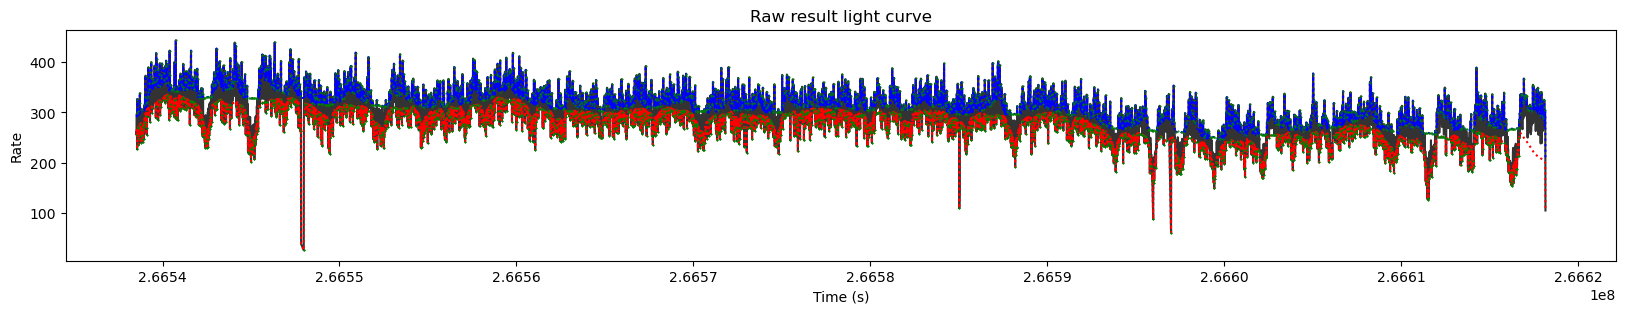

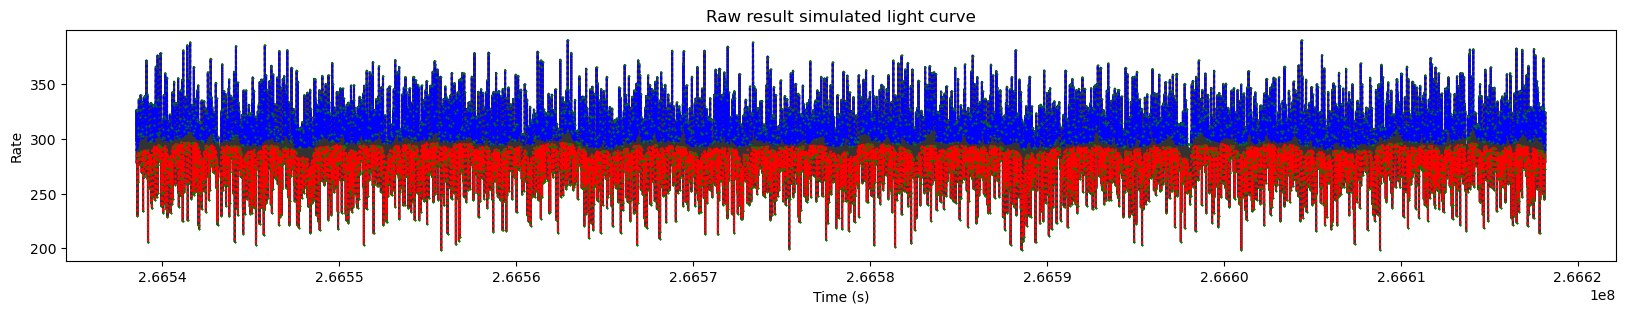

Train auto-encoders in syntetic data
DIPS----------------------------------------------------------------------------------------


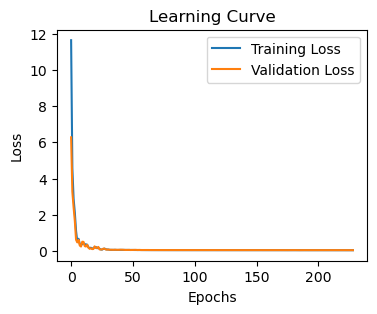

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step


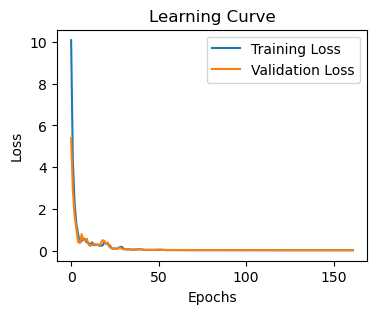

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
PEAKS---------------------------------------------------------------------------------------


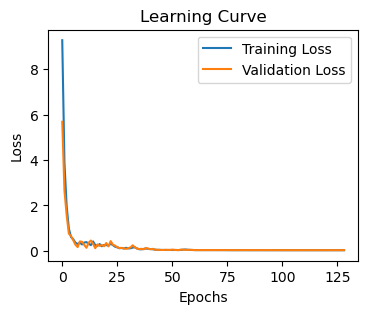

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step


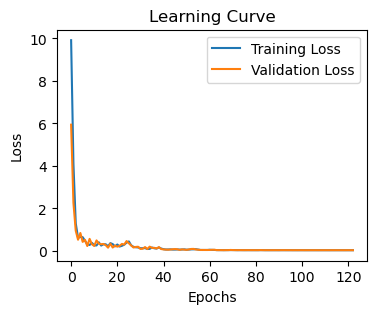

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
Simulation:
Peaks per second: 0.0003 percentage of rejected peaks: 0.9898
Dips per second: 0.0003 percentage of rejected dips: 0.9896
Result:
Peaks per second: 0.003 percentage of rejected peaks: 0.8941 probability of detected peaks: 1.0
Dips per second: 0.0021 percentage of rejected dips: 0.92 probability of detected dips: 0.87


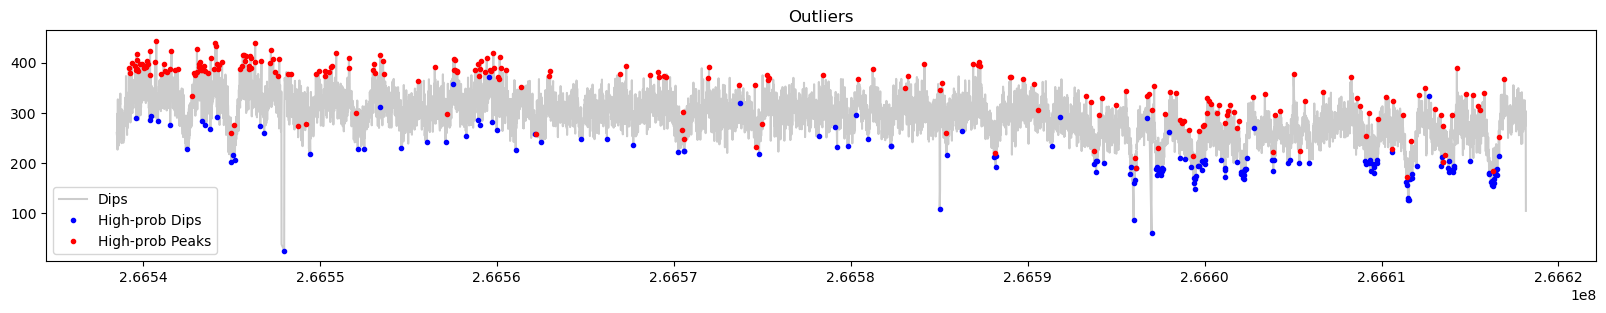

Creating syntetic data
- done!
Rebin light curve and syntetic lightcurve to the desired sn
Done!
Calculate bases for dip/peak detection
- done!
- detecting dips and peaks within light curve and syntetic lightcurve
- done!


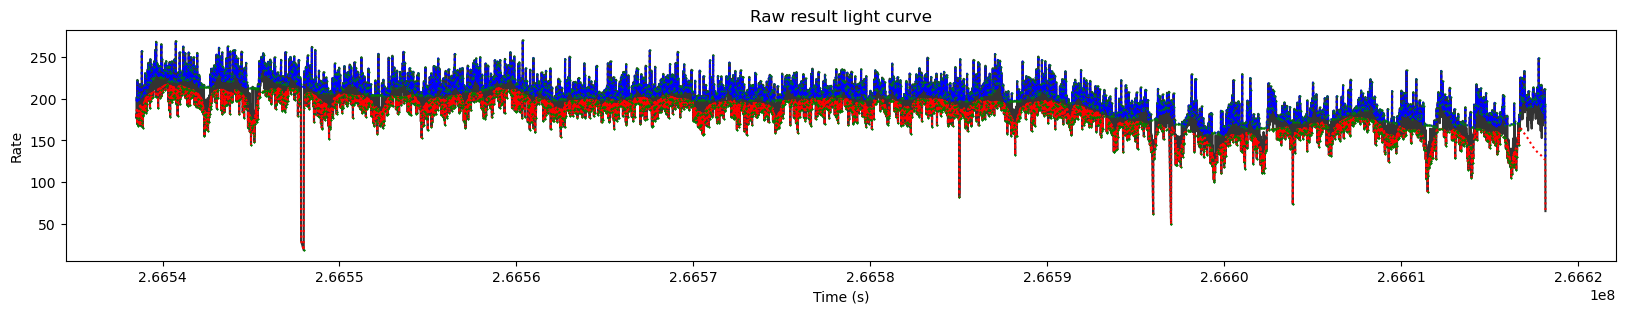

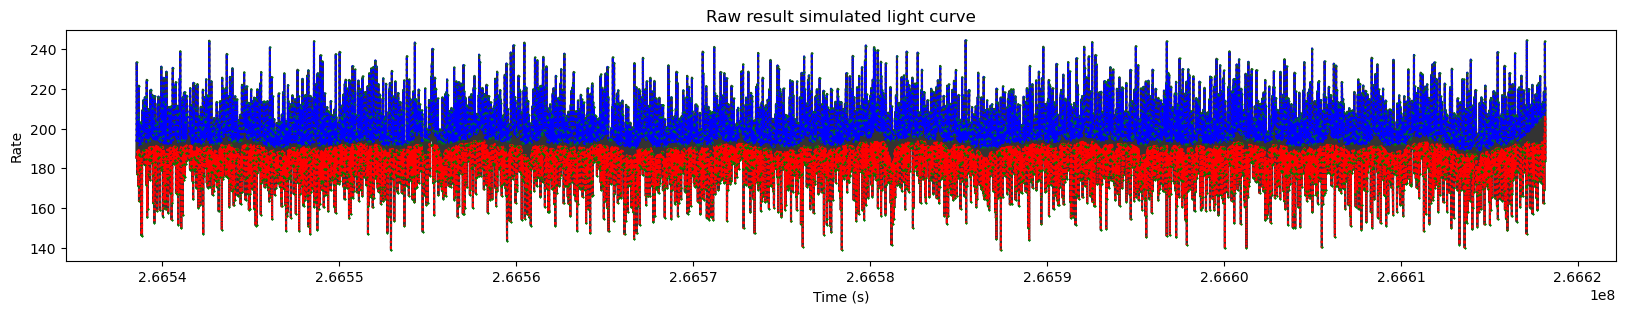

Train auto-encoders in syntetic data
DIPS----------------------------------------------------------------------------------------


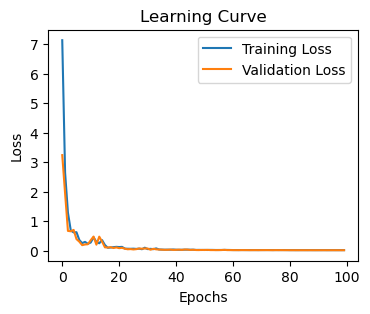

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step


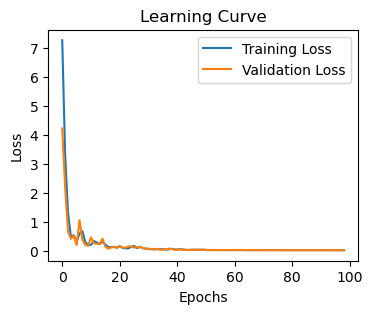

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
PEAKS---------------------------------------------------------------------------------------


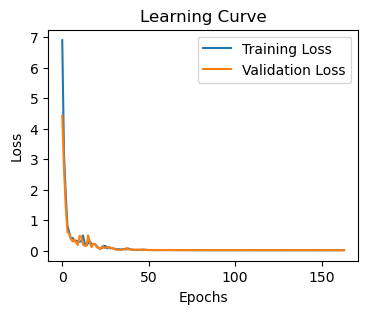

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step


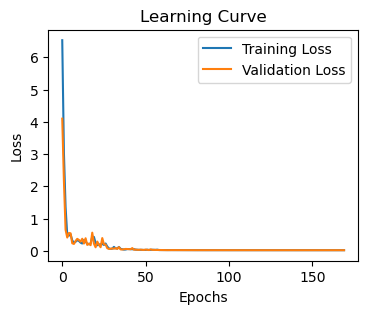

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step
Simulation:
Peaks per second: 0.0003 percentage of rejected peaks: 0.9897
Dips per second: 0.0003 percentage of rejected dips: 0.9898
Result:
Peaks per second: 0.0031 percentage of rejected peaks: 0.8943 probability of detected peaks: 1.0
Dips per second: 0.002 percentage of rejected dips: 0.924 probability of detected dips: 0.87


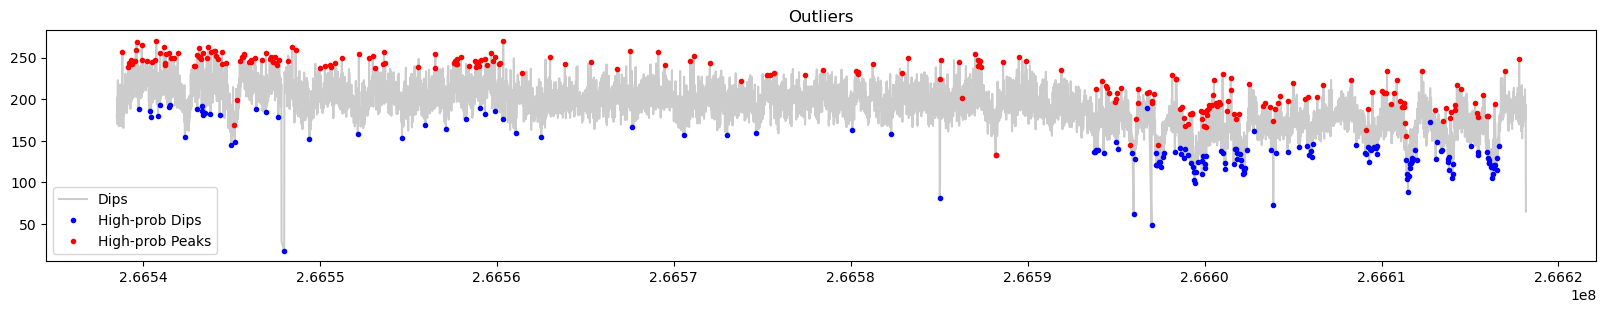

In [2]:
high_lc="./high"
low_lc="./low"

high_peaks_to_clean, high_dips_to_clean, high_lcreb, high_speaks_to_clean, high_sdips_to_clean = detect_dips_and_peaks(high_lc, snr=0.1 ,index_time=0, index_rate=1, index_error_rate=2, num_simulations=1, show_plot = True)
low_peaks_to_clean, low_dips_to_clean, low_lcreb, low_speaks_to_clean, low_sdips_to_clean = detect_dips_and_peaks(low_lc, snr=0.1 ,index_time=0, index_rate=1, index_error_rate=2, num_simulations=1, show_plot = True)

## The result we obtain from our script is the _raw list of peaks and dips and the rebined lightcurve. To perform the analysis we should filter our peaks and dips


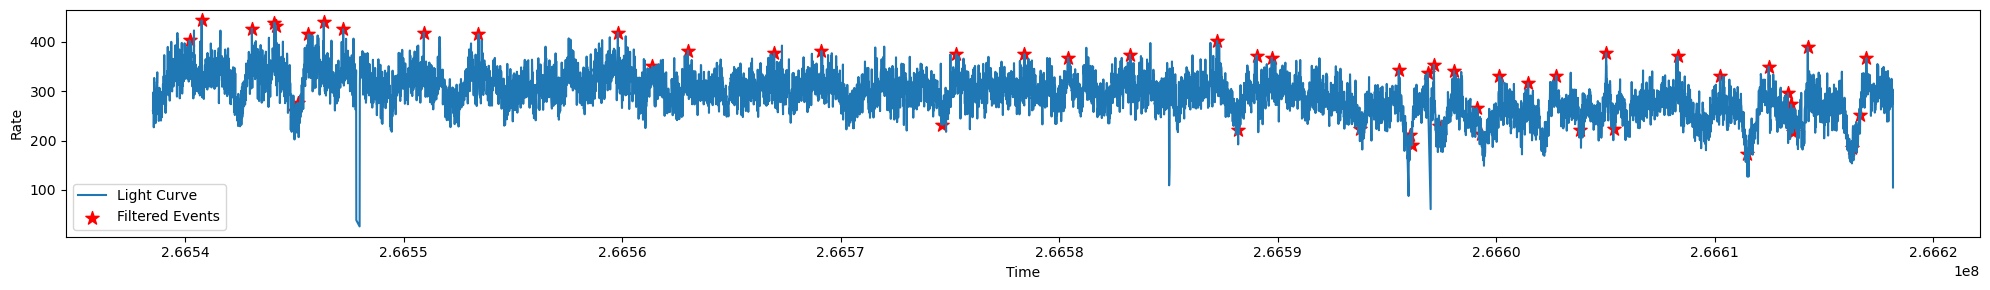

The probability of this filtered dataset being real is 0.0000


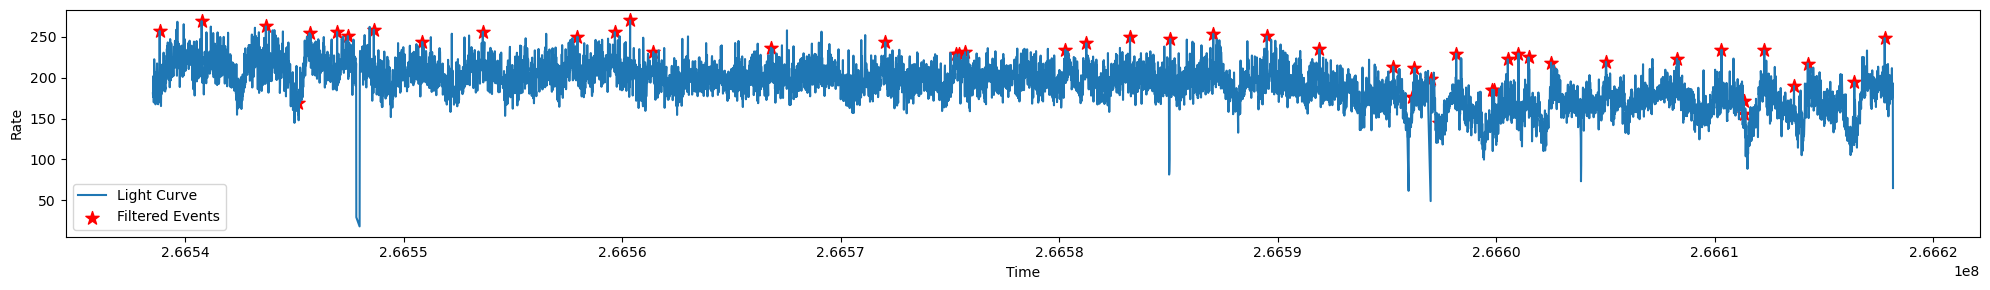

The probability of this filtered dataset being real is 0.0000


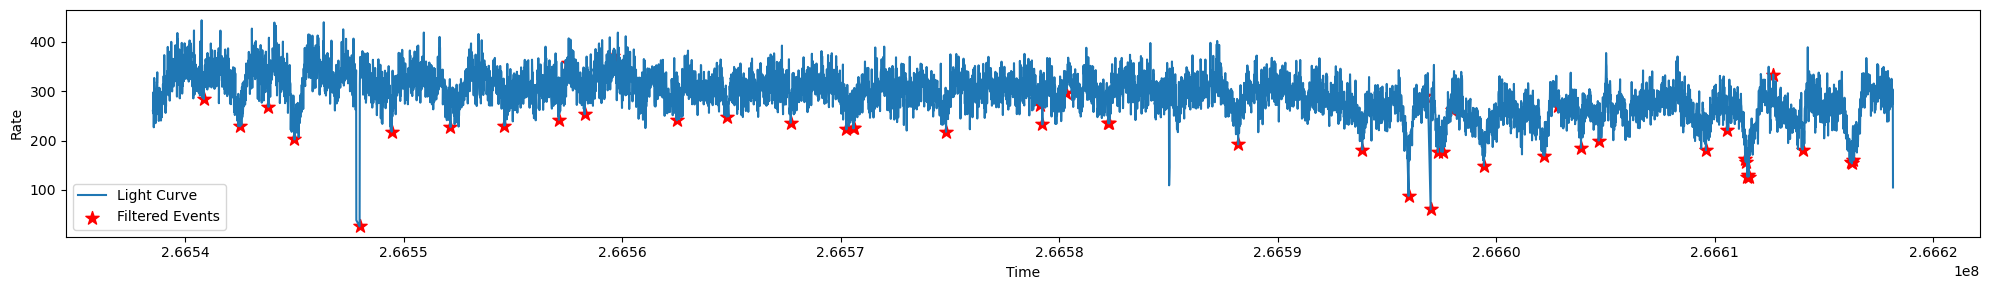

The probability of this filtered dataset being real is 0.0000


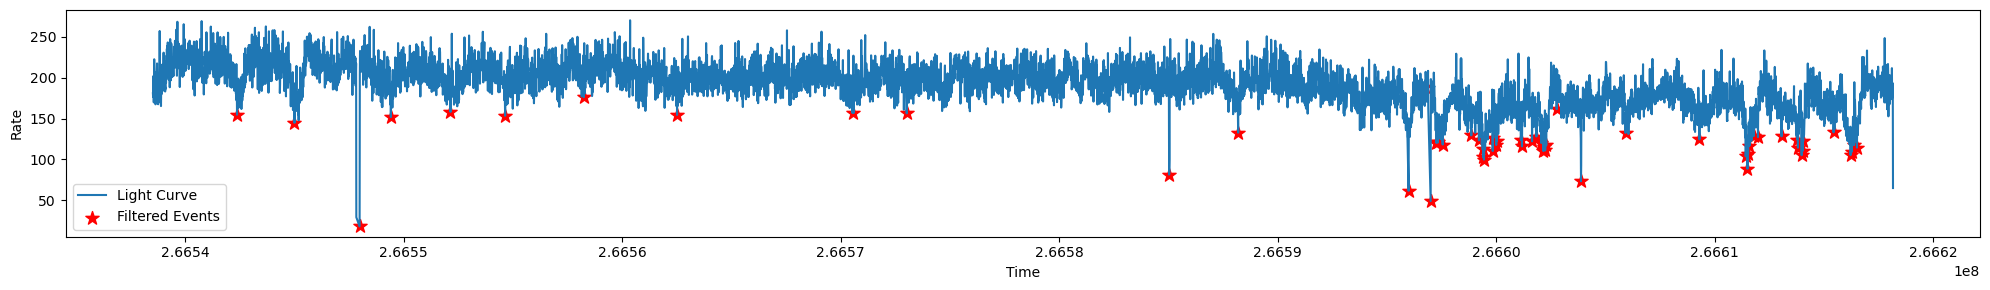

The probability of this filtered dataset being real is 0.0000


In [3]:
high_peaks = filter_dip_peak(high_peaks_to_clean,
                       high_speaks_to_clean,
                       high_lcreb,
                       error_percentile_threshold=0.999,
                       zscore_threshold=4,
                       show_plot=True)

low_peaks = filter_dip_peak(low_peaks_to_clean,
                       low_speaks_to_clean,
                       low_lcreb,
                       error_percentile_threshold=0.999,
                       zscore_threshold=4,
                       show_plot=True)

high_dips = filter_dip_peak(high_dips_to_clean,
                       high_sdips_to_clean,
                       high_lcreb,
                       error_percentile_threshold=0.999,
                       zscore_threshold=4,
                       show_plot=True)

low_dips = filter_dip_peak(low_dips_to_clean,
                       low_sdips_to_clean,
                       low_lcreb,
                       error_percentile_threshold=0.999,
                       zscore_threshold=4,
                       show_plot=True)

Some features have a excesive duration, we will filter those events:

In [ ]:
#Time filter
high_peaks = high_peaks[high_peaks.duration<5000].reset_index(drop=True)
low_peaks = low_peaks[low_peaks.duration<5000].reset_index(drop=True)
high_dips = high_dips[high_dips.duration<5000].reset_index(drop=True)
low_dips = low_dips[low_dips.duration<5000].reset_index(drop=True)

## PEAK ANALYSIS

- In first place we will visualize the data. 
- In second place we will check overlaps between peaks detected in the high and in the low energy light curves

The function overlap provides the duration of the overlap, the indexes for both datasets and the overlap percentaje of the two features (dips and peaks) that overlap.
We can filter those which overlap at least by certain percentaje of their durations.

In [ ]:
overlap_threshold= 0.5

overlap_, high_peak_idx_, low_peak_idx_, percentaje_high, percentaje_low = overlap(high_peaks.ti, high_peaks.te, low_peaks.ti, low_peaks.te)

high_peak_idx = high_peak_idx_[(percentaje_high>overlap_threshold)&(percentaje_low>overlap_threshold)]
low_peak_idx = low_peak_idx_[(percentaje_high>overlap_threshold)&(percentaje_low>overlap_threshold)]

plt.plot(high_peaks.duration, high_peaks.prominence,"r*", markersize=1)
plt.plot(high_peaks.duration, high_peaks.prominence,"go", markersize=1)
plt.plot(high_peaks.duration[high_peak_idx], high_peaks.prominence[high_peak_idx],"r*",alpha=0.3)
plt.plot(low_peaks.duration[low_peak_idx], low_peaks.prominence[low_peak_idx],"go",alpha=0.3)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Duration")
plt.ylabel("Prominence")

Now, we will use gaussian mixture to check id the peaks present in this dataset can be grouped in clusters with similar characteristics. The function gmm_dips_peaks calculates the shilouwtte score and returns a dataframe with the stars of each cluster plus the labels.
The clustering can be performed in logarithmic scale if required by setting log_scale=True

In [ ]:
cluster_stats, labels = gmm_dips_peaks(high_peaks, log_scale=True)

In [ ]:
cluster_stats

In [ ]:
cluster_stats, labels = gmm_dips_peaks(high_peaks, log_scale=False)

In [ ]:
cluster_stats

## DIP ANALYSIS

In [ ]:
high_dips_overlap = high_dips.loc[high_dip_idx].reset_index(drop=True)
low_dips_overlap = low_dips.loc[low_dip_idx].reset_index(drop=True)



In [ ]:
overlap_threshold= 0.5

overlap_, high_dip_idx_, low_dip_idx_, percentaje_high, percentaje_low = overlap(high_dips.ti, high_dips.te, low_dips.ti, low_dips.te)

high_dip_idx = high_dip_idx_[(percentaje_high>overlap_threshold)&(percentaje_low>overlap_threshold)]
low_dip_idx = low_dip_idx_[(percentaje_high>overlap_threshold)&(percentaje_low>overlap_threshold)]

plt.plot(high_dips.duration[high_dip_idx], high_dips.relprominence[high_dip_idx],"r*",alpha=0.3)
plt.plot(low_dips.duration[low_dip_idx], low_dips.relprominence[low_dip_idx],"go",alpha=0.3)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Duration")
plt.ylabel("Prominence")

In [ ]:
def clump_candidates(high_dips, low_dips, lc, overlap_threshold=5):
    
    overlap_, high_dip_idx_, low_dip_idx_, percentaje_high, percentaje_low = overlap(high_dips.ti, high_dips.te, low_dips.ti, low_dips.te)
    
    high_dip_idx = high_dip_idx_[(percentaje_high>overlap_threshold)&(percentaje_low>overlap_threshold)]
    low_dip_idx = low_dip_idx_[(percentaje_high>overlap_threshold)&(percentaje_low>overlap_threshold)]
    
    high_dips_overlap = high_dips.loc[high_dip_idx].reset_index(drop=True)
    low_dips_overlap = low_dips.loc[low_dip_idx].reset_index(drop=True)

    clump_index = low_dips_overlap.relprominence/high_dips_overlap.relprominence >1
    
    high_clump = high_dips_overlap.loc[clump_index].reset_index(drop=True)
    low_clump = low_dips_overlap.loc[clump_index].reset_index(drop=True)
    
    return high_clump, low_clump



In [ ]:
clump_candidates(high_dips, low_dips, overlap_threshold=5)